In [1]:
! pip install tensorflow

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built gast absl-py termcolor


## 使用Tensorflow 分類MNIST 數據

In [2]:
import tensorflow as tf

In [3]:
import os
os.mkdir('mnist')

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist", one_hot=True)

W0817 09:46:32.937018  5792 deprecation.py:323] From <ipython-input-4-91ef6a97d5b7>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0817 09:46:32.938018  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0817 09:46:32.939018  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist\train-images-idx3-ubyte.gz


W0817 09:46:33.677061  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0817 09:46:33.679060  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist\t10k-images-idx3-ubyte.gz


W0817 09:46:33.882072  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist\t10k-labels-idx1-ubyte.gz


### One Hot
- [小資女, 貴婦, 學生, 小資女, 貴婦] 
- [1,2,0,1,2]

        ``` 
        [
        [0,1,0],
        [0,0,1],
        [1,0,0],
        [0,1,0],
        [0,0,1],

        ]
        ```

### 檢視數據

In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000000A8A1BE0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000115853C8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000124B8860>)

In [8]:
mnist.train.labels.shape

(55000, 10)

In [7]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [11]:
import numpy
numpy.argmax(mnist.train.labels[0])

7

In [12]:
mnist.test.labels.shape

(10000, 10)

In [15]:
mnist.train.images.shape

(55000, 784)

In [13]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
mnist.train.images[0].shape

(784,)

In [24]:
#mnist.train.images[0].reshape((392,2))

In [21]:
sample_image = mnist.train.images[0].reshape((28,28))

In [22]:
sample_image.shape

(28, 28)

Populating the interactive namespace from numpy and matplotlib


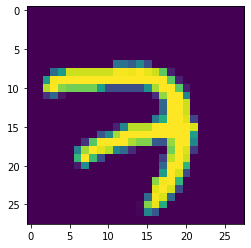

In [25]:
%pylab inline
import matplotlib.pyplot as plt

plt.imshow(sample_image)

### 設定網路參數

In [26]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

In [27]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

- 784 (input) => hidden1(256) => hidden2(256) => output(10)

### 定義Input & Output (Placeholder)

In [28]:
x = tf.placeholder("float", [None, n_input]) # 784 pixels
y = tf.placeholder("float", [None, n_classes]) # 10 digits

### 建構神經網路

In [29]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) # W * X + B
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### 設定權重與偏倚(Variable)

In [30]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])), # 784 * 256
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])), # 256 * 256
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))# 256 * 10
}

In [31]:

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])), # 256
    'b2': tf.Variable(tf.random_normal([n_hidden_2])), # 256
    'out': tf.Variable(tf.random_normal([n_classes]))  # 10 
}

### 建立模型

In [32]:
pred = multilayer_perceptron(x, weights, biases)

### 設定代價函數

- 784 (input) => hidden1(256) => hidden2(256) => output(10) => SoftMax => Cross Entropy

In [33]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

W0817 10:05:25.782813  5792 deprecation.py:323] From <ipython-input-33-c98ca870291b>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### 初始化變量

In [34]:
init = tf.global_variables_initializer()

### 執行會話

In [35]:
# Start the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

for epoch in range(training_epochs):

    # Initial the cost = 0.0
    avg_cost = 0.0

    total_batch = int(n_samples/batch_size) # 55000 / 100 = 550

    for i in range(total_batch): # 550

        batch_x, batch_y = mnist.train.next_batch(batch_size) # 100
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={}".format(epoch+1,avg_cost))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=162.63954968539153
Epoch: 2 cost=58.55973821640019
Epoch: 3 cost=42.77415552486071
Epoch: 4 cost=34.342986064390715
Epoch: 5 cost=29.041468033357106
Epoch: 6 cost=25.374405524947438
Epoch: 7 cost=22.484230911081493
Epoch: 8 cost=20.2814972386577
Epoch: 9 cost=18.46488879030401
Epoch: 10 cost=16.913518527773288
Epoch: 11 cost=15.684016455303532
Epoch: 12 cost=14.505820028375492
Epoch: 13 cost=13.619367648999802
Epoch: 14 cost=12.714606029770584
Epoch: 15 cost=11.960446925921866
Training Completed in 15 Epochs


### 評估模型

In [36]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [37]:
correct_predictions = tf.cast(correct_predictions, "float")

In [38]:
accuracy = tf.reduce_mean(correct_predictions)

In [39]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9136


## 使用TensorBoard 視覺化呈現網路建構過程

### 讀取MNIST數據集

In [40]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist", one_hot=True)

Extracting ./mnist\train-images-idx3-ubyte.gz
Extracting ./mnist\train-labels-idx1-ubyte.gz
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz


### 設定網路參數

In [41]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [42]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

### 定義Placeholders

In [43]:
with tf.name_scope('inputs'):
    x = tf.placeholder("float", [None, n_input],   name= 'input_x')
    y = tf.placeholder("float", [None, n_classes], name= 'input_y')

### 產生影像檔

In [44]:
with tf.name_scope('input_reshape'):
    image_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input', image_input, 10)

### 建構多層神經網路

In [45]:
def add_layer(x, input_tensors, output_tensors, layer_name, activation_function = None):  
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            weight = tf.Variable(tf.random_normal([input_tensors, output_tensors]), name = 'w')
            tf.summary.histogram(name = layer_name + '/Weights', values = weight)
        with tf.name_scope('Bias'):
            bias = tf.Variable(tf.random_normal([output_tensors]), name= 'b')
            tf.summary.histogram(name = layer_name + '/Bias', values = bias)
        with tf.name_scope('Wx_plus_b'):
            formula = tf.add(tf.matmul(x, weight), bias)
            
        if activation_function is None:
            outputs = formula
        else:
            outputs = activation_function(formula)
            
        tf.summary.histogram(name = layer_name + '/Outputs', values = outputs)
        return outputs

### 添加隱藏層

In [46]:
layer1 = add_layer(x, input_tensors = n_input, output_tensors = n_hidden_1, layer_name='layer1',activation_function = tf.nn.relu)
layer2 = add_layer(layer1, input_tensors = n_hidden_1, output_tensors = n_hidden_2, layer_name='layer2',activation_function = tf.nn.relu)
out_layer = add_layer(layer2, input_tensors = n_hidden_2, output_tensors = n_classes, layer_name='out_layer',activation_function = None)

### 設定代價函數

In [47]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=y))
    tf.summary.scalar('loss', cost)
    
with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    acc = tf.equal(tf.argmax(out_layer, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    tf.summary.scalar("accuracy", acc)

### 初始化變量

In [48]:
init = tf.global_variables_initializer()

### 訓練模型

In [49]:
merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)

    ## Merge Summary
    
    writer = tf.summary.FileWriter("tensorboard3/", graph = sess.graph)

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_samples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, result = sess.run([optimizer, cost, merged], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
            ## Adding summary of each step
            writer.add_summary(result,  epoch * total_batch + i)

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

    print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=158.2789852697198
Epoch: 2 cost=61.26732438694344
Epoch: 3 cost=45.19476784359327
Epoch: 4 cost=36.654014079353985
Epoch: 5 cost=31.002138905525197
Epoch: 6 cost=27.05141910119492
Epoch: 7 cost=24.055611841678633
Epoch: 8 cost=21.74014560786156
Epoch: 9 cost=19.77620756062594
Epoch: 10 cost=18.164622361985124
Epoch: 11 cost=16.743623175390738
Epoch: 12 cost=15.541510716568329
Epoch: 13 cost=14.447600691318511
Epoch: 14 cost=13.61334546051242
Epoch: 15 cost=12.724130941900336
Training Completed in 15 Epochs


### 打開tensorboard

- 打開 anaconda prompt
- tensorboard --logdir tensorboard3/ --host 127.0.0.1
- http://127.0.0.1:6006

In [50]:
f = open('123.txt' , 'w')
f.write('123')
f.close()

In [51]:
with open('123.txt' , 'w') as f:
    f.write('123')

## Keras 安裝

In [52]:
! pip install keras

In [53]:
import keras

Using TensorFlow backend.


## 使用Keras 分類MNIST 數據

### 引用Keras 套件

In [55]:
import keras
from keras.datasets import mnist
from keras.models   import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense # W * X + B

### 讀取MNIST 數據

In [56]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 15s 1us/step


In [57]:
x_train.shape

(60000, 28, 28)

In [58]:
x_test.shape

(10000, 28, 28)

In [59]:
y_train.shape

(60000,)

In [60]:
y_test.shape

(10000,)

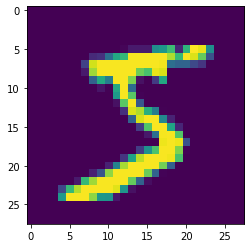

In [63]:
plt.imshow(x_train[0])

In [65]:
y_train[0]

5

In [67]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [68]:
x_train.shape

(60000, 784)

In [69]:
x_test.shape

(10000, 784)

In [70]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

In [73]:
x_train[0].min(),x_train[0].max() 

(0.0, 255.0)

In [74]:
x_train /= 255
x_test  /= 255

In [75]:
x_train[0].min(),x_train[0].max() 

(0.0, 1.0)

In [76]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [77]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [78]:
y_train.shape

(60000, 10)

In [80]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 設定網路參數

In [81]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

### 建立神經網路

In [82]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes,  activation='softmax'))

W0817 11:09:27.589248  5792 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 11:09:27.591248  5792 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 11:09:27.595249  5792 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [83]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

W0817 11:09:59.606080  5792 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 11:09:59.632081  5792 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



###  訓練神經網路

In [84]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

W0817 11:11:05.946874  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0817 11:11:05.992877  5792 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 27us/step - loss: 1.0076 - acc: 0.7610 - val_loss: 0.4724 - val_acc: 0.8842
Epoch 2/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.4167 - acc: 0.8876 - val_loss: 0.3497 - val_acc: 0.9039
Epoch 3/15
60000/60000 [==============================] - 2s 26us/step - loss: 0.3408 - acc: 0.9033 - val_loss: 0.3056 - val_acc: 0.9164
Epoch 4/15
60000/60000 [==============================] - 2s 26us/step - loss: 0.3048 - acc: 0.9129 - val_loss: 0.2782 - val_acc: 0.9215
Epoch 5/15
60000/60000 [==============================] - 2s 26us/step - loss: 0.2803 - acc: 0.9195 - val_loss: 0.2592 - val_acc: 0.9264
Epoch 6/15
60000/60000 [==============================] - 2s 25us/step - loss: 0.2608 - acc: 0.9253 - val_loss: 0.2428 - val_acc: 0.9328
Epoch 7/15
60000/60000 [==============================] - 2s 25us/step - loss: 0.2448 - acc: 0.9296 - val_loss: 0.2296 - val_acc

In [86]:
predicted = model.predict(x_test)

In [89]:
import numpy
predicted_y = numpy.argmax(predicted, 1)

In [90]:
real_y = numpy.argmax(y_test, 1)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(real_y, predicted_y)

0.9533

In [92]:
confusion_matrix(real_y, predicted_y)

array([[ 967,    0,    1,    2,    0,    4,    4,    1,    1,    0],
       [   0, 1118,    2,    2,    1,    1,    4,    2,    5,    0],
       [   8,    1,  982,    8,    5,    1,    7,    7,   11,    2],
       [   0,    1,   14,  953,    0,   20,    0,   10,   10,    2],
       [   1,    1,    5,    0,  935,    0,   11,    4,    3,   22],
       [   9,    1,    0,   12,    3,  847,    9,    0,    6,    5],
       [  10,    3,    3,    1,    7,   12,  920,    1,    1,    0],
       [   2,    8,   23,    4,    3,    2,    0,  967,    2,   17],
       [   3,    2,    5,   15,    7,   14,   10,    6,  909,    3],
       [   9,    8,    1,    9,   23,    7,    1,   10,    6,  935]],
      dtype=int64)

## 使用Keras 分類 IRIS

In [93]:
from sklearn.datasets import load_iris
iris = load_iris()

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(iris.data)

In [99]:
#dataset

In [101]:
y = keras.utils.to_categorical(iris.target, 3)

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.2, random_state = 123)

In [104]:
x_train.shape

(120, 4)

In [105]:
x_test.shape

(30, 4)

In [106]:
y_train.shape

(120, 3)

In [107]:
y_test.shape

(30, 3)

### 任務:
- 使用Keras 建構一深度學習模型來分類iris 資料

In [108]:
n_classes  = 3
n_input    = 4
n_hidden_1 = 5
n_hidden_2 = 5

In [109]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes,  activation='softmax'))

In [110]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [113]:
history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 0s 133us/step - loss: 0.1300 - acc: 0.9583 - val_loss: 0.1832 - val_acc: 0.9667
Epoch 2/10
120/120 [==============================] - 0s 125us/step - loss: 0.1284 - acc: 0.9667 - val_loss: 0.1806 - val_acc: 0.9667
Epoch 3/10
120/120 [==============================] - 0s 83us/step - loss: 0.1283 - acc: 0.9583 - val_loss: 0.1812 - val_acc: 0.9667
Epoch 4/10
120/120 [==============================] - 0s 92us/step - loss: 0.1269 - acc: 0.9667 - val_loss: 0.1799 - val_acc: 0.9667
Epoch 5/10
120/120 [==============================] - 0s 100us/step - loss: 0.1256 - acc: 0.9667 - val_loss: 0.1795 - val_acc: 0.9667
Epoch 6/10
120/120 [==============================] - 0s 83us/step - loss: 0.1250 - acc: 0.9667 - val_loss: 0.1777 - val_acc: 0.9667
Epoch 7/10
120/120 [==============================] - 0s 83us/step - loss: 0.1243 - acc: 0.9667 - val_loss: 0.1783 - val_acc: 0.9667
Epoch 8/10
120/120 [=

In [116]:
predict_y = numpy.argmax(model.predict(x_test),axis = 1)

In [117]:
real_y = numpy.argmax(y_test,axis = 1)

In [118]:
accuracy_score(real_y, predict_y)

0.9666666666666667

In [119]:
confusion_matrix(real_y, predict_y)

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]], dtype=int64)

In [128]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes,  activation='softmax'))

In [129]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [130]:
savetb = keras.callbacks.TensorBoard(log_dir="./tb3")

history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=0,
                    validation_data=(x_test, y_test),
                    callbacks=[savetb])

### 層級資料格式（Hierarchical Data Format：HDF）
- 是設計用來儲存和組織大量資料的一組檔案格式（HDF4，HDF5）。它最初開發於美國國家超級計算應用中心，現在由非營利社團HDF Group支援，其任務是確保HDF5技術的持續開發和儲存在HDF中資料的持續可存取性。
- https://zh.wikipedia.org/wiki/HDF

In [136]:
?model.save

In [131]:
model.save('iris.hd5')

In [137]:
?model.save_weights

In [133]:
model2 = keras.models.load_model('iris.hd5')

In [134]:
predict_y = numpy.argmax(model2.predict(x_test),axis = 1)

In [135]:
predict_y

array([2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0], dtype=int64)

In [138]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 18        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.layers[0].get_weights()

[array([[-0.8556102 ,  0.10812764, -0.29156172, -0.16002828, -0.51679444],
        [-0.62004566, -0.69640493, -0.23586531,  0.03217382,  0.6560474 ],
        [ 0.29546788,  0.9895802 , -0.00458705,  0.19554622, -0.8726329 ],
        [-0.49753076,  0.5048425 , -0.04925686,  0.9805014 , -0.41607448]],
       dtype=float32),
 array([ 0.28729242,  0.13386457,  0.03886611, -0.11620525,  0.28713062],
       dtype=float32)]

## Flask
- https://flask.palletsprojects.com/en/1.0.x/

In [148]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


I0817 12:21:41.227059  5792 _internal.py:122]  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
I0817 12:21:44.891269  6420 _internal.py:122] 127.0.0.1 - - [17/Aug/2019 12:21:44] "GET / HTTP/1.1" 200 -
I0817 12:21:44.943272  5884 _internal.py:122] 127.0.0.1 - - [17/Aug/2019 12:21:44] "GET /favicon.ico HTTP/1.1" 404 -


In [187]:
x_test[1]
1.15917263,-0.13197948,0.99010798,1.18556721

array([ 1.15917263, -0.13197948,  0.99010798,  1.18556721])

In [ ]:
from flask import Flask
import keras
import numpy
app = Flask(__name__)

@app.route('/<x_test>')
def hello_world(x_test):
    x = numpy.array(x_test.split(','))
    model2 = keras.models.load_model('iris.hd5')
    print(x.reshape(1,4))
    predict_y = numpy.argmax(model2.predict(x.reshape(1,4)),axis = 1)
    return str(int(predict_y))
app.run()

In [168]:
x = numpy.array('0.55333328,-1.28296331,0.64908342,0.3957741'.split(','))

In [169]:
model2 = keras.models.load_model('iris.hd5')
predict_y = numpy.argmax(model2.predict(x.reshape(1,4)),axis = 1)

In [180]:
type(int(predict_y[0]))

int